<h2>Titanic Dataset Analysis - Machine Learning from Disaster</h2>

<h3>Importing libraries</h3>

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<h3>Loading dataset</h3>

In [31]:
titanic_df = pd.read_csv("./data/train.csv")
print("Number of rows:", len(titanic_df))

Number of rows: 891


In [32]:
print("Missing data")
print(titanic_df.isna().sum())

Missing data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<h4>Analyzing Pclass</h4>

In [33]:
print("NaN count:", titanic_df["Pclass"].isna().sum())

NaN count: 0


In [34]:
print("Total Count", titanic_df["Pclass"].value_counts().sort_index())
print("\n")
print("Survivor Count", titanic_df[titanic_df["Survived"] == 1]["Pclass"].value_counts().sort_index())
print("\n")
print("Dead Count", titanic_df[titanic_df["Survived"] == 0]["Pclass"].value_counts().sort_index())


Total Count Pclass
1    216
2    184
3    491
Name: count, dtype: int64


Survivor Count Pclass
1    136
2     87
3    119
Name: count, dtype: int64


Dead Count Pclass
1     80
2     97
3    372
Name: count, dtype: int64


We decide to keep this column. The data shows us that this column has a direct impact on the result.

**Pclass (1)**: $ 136\text{ survivors} + 80\text{ dead} = 216\text{ people}$<br>
**Pclass (2)**: $ 87\text{ survivors} + 97\text{ dead} = 184\text{ people}$<br>
**Pclass (3)**: $ 119\text{ survivors} + 372\text{ dead} = 491\text{ people}$<br>


<h4>Analyzing Sex</h4>

In [35]:
print("NaN count:", titanic_df["Sex"].isnull().sum())

NaN count: 0


In [36]:
print("Total Count", titanic_df["Sex"].value_counts().sort_index())
print("\n")

print("Survivor Count", titanic_df[titanic_df["Survived"] == 1]["Sex"].value_counts().sort_index())
print("\n")

print("Dead Count", titanic_df[titanic_df["Survived"] == 0]["Sex"].value_counts().sort_index())
print("\n")

Total Count Sex
female    314
male      577
Name: count, dtype: int64


Survivor Count Sex
female    233
male      109
Name: count, dtype: int64


Dead Count Sex
female     81
male      468
Name: count, dtype: int64




We decide to keep this column. The data shows us that this column has a direct impact on the result.

**Sex (female)**: $ 233\text{ survivors} + 81\text{ dead} = 314\text{ people}$<br>
**Sex (male)**: $ 109\text{ survivors} + 468\text{ dead} = 577\text{ people}$<br>

<h4>Analyzing Age</h4>

In [37]:
print("NaN count:", titanic_df["Age"].isnull().sum())

NaN count: 177


In [38]:
print("Total Count", titanic_df["Age"].value_counts().sort_index())

Total Count Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64


In [39]:
from sklearn.impute import SimpleImputer

age_si = SimpleImputer()
titanic_df["Age"] = age_si.fit_transform(titanic_df["Age"].values.reshape(-1, 1))

print("NaN count:", titanic_df["Age"].isnull().sum())

NaN count: 0


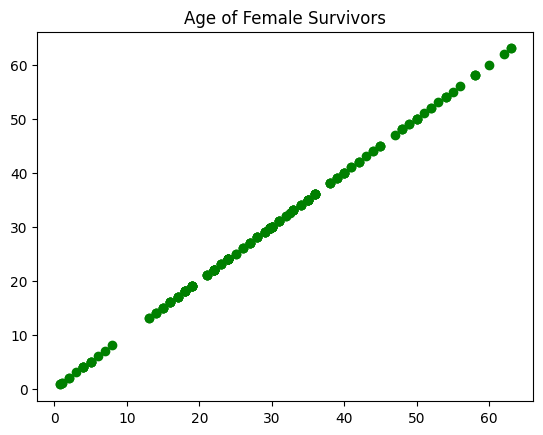

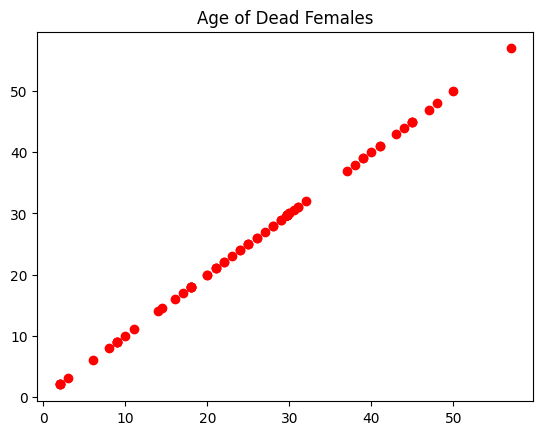

In [40]:
df_female = titanic_df[titanic_df["Sex"] == "female"]
plt.scatter(df_female[df_female["Survived"] == 1]["Age"].values, df_female[df_female["Survived"] == 1]["Age"].values, c = "green")
plt.title("Age of Female Survivors")
plt.show()

plt.scatter(df_female[df_female["Survived"] == 0]["Age"].values, df_female[df_female["Survived"] == 0]["Age"].values, c = "red")
plt.title("Age of Dead Females")
plt.show()

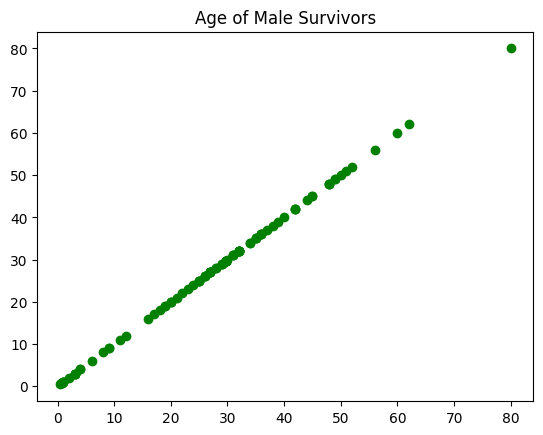

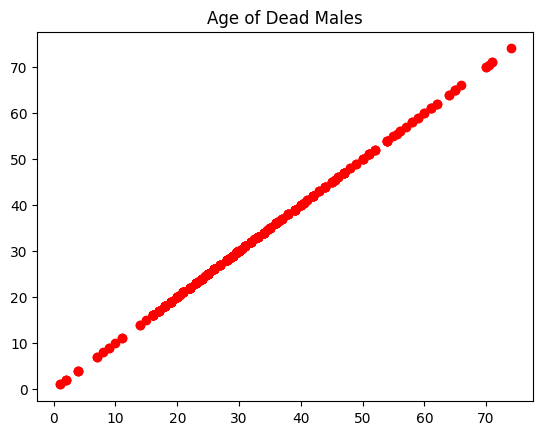

In [41]:
df_male = titanic_df[titanic_df["Sex"] == "male"]
plt.scatter(df_male[df_male["Survived"] == 1]["Age"].values, df_male[df_male["Survived"] == 1]["Age"].values, c = "green")
plt.title("Age of Male Survivors")
plt.show()

plt.scatter(df_male[df_male["Survived"] == 0]["Age"].values, df_male[df_male["Survived"] == 0]["Age"].values, c = "red")
plt.title("Age of Dead Males")
plt.show()

We decide to keep this column. The data shows us that this column has a direct impact on the result.

**Age (continous)**: $ 714\text{ not missing} + 177\text{ imputed} = 891\text{ people}$

<h4>Analyzing SibSp</h4>

In [42]:
print("NaN count:", titanic_df["SibSp"].isnull().sum())

NaN count: 0


In [43]:
print("Total Count", titanic_df["SibSp"].value_counts().sort_index())
print("\n")

print("Survivor Count", titanic_df[titanic_df["Survived"] == 1]["SibSp"].value_counts().sort_index())
print("\n")

print("Dead Count", titanic_df[titanic_df["Survived"] == 0]["SibSp"].value_counts().sort_index())
print("\n")

Total Count SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64


Survivor Count SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64


Dead Count SibSp
0    398
1     97
2     15
3     12
4     15
5      5
8      7
Name: count, dtype: int64




We decide to keep this column. The data shows us that this column has a direct impact on the result.

**SibSp (0)**: $ 210\text{ survivors} + 398\text{ dead} = 608\text{ people}$ <br>
**SibSp (1)**: $ 112\text{ survivors} + 97\text{ dead} = 209\text{ people}$ <br>
**SibSp (2)**: $ 13\text{ survivors} + 15\text{ dead} = 28\text{ people}$ <br>
**SibSp (3)**: $ 4\text{ survivors} + 12\text{ dead} = 16\text{ people}$ <br>
**SibSp (4)**: $ 3\text{ survivors} + 15\text{ dead} = 18\text{ people}$ <br>
**SibSp (5)**: $ 0\text{ survivors} + 5\text{ dead} = 5\text{ people}$ <br>
**SibSp (6)**: $ 0\text{ survivors} + 0\text{ dead} = 0\text{ people}$ <br>
**SibSp (7)**: $ 0\text{ survivors} + 0\text{ dead} = 0\text{ people}$ <br>
**SibSp (8)**: $ 0\text{ survivors} + 7\text{ dead} = 7\text{ people}$ <br>


<h4>Analyzing Parch</h4>

In [44]:
print("NaN count:", titanic_df["Parch"].isnull().sum())

NaN count: 0


In [45]:
print("Total Count", titanic_df["Parch"].value_counts().sort_index())
print("\n")

print("Survivor Count", titanic_df[titanic_df["Survived"] == 1]["Parch"].value_counts().sort_index())
print("\n")

print("Dead Count", titanic_df[titanic_df["Survived"] == 0]["Parch"].value_counts().sort_index())
print("\n")

Total Count Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64


Survivor Count Parch
0    233
1     65
2     40
3      3
5      1
Name: count, dtype: int64


Dead Count Parch
0    445
1     53
2     40
3      2
4      4
5      4
6      1
Name: count, dtype: int64




We decide to keep this column. The data shows us that this column has a direct impact on the result.

<h4>Analyzing Ticket</h4>

In [46]:
print("NaN count:", titanic_df["Ticket"].isna().sum())

NaN count: 0


In [47]:
print("Total Count", titanic_df["Ticket"].value_counts().sort_index())

Total Count Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: count, Length: 681, dtype: int64


We decide to drop this column. The data shows us that this column has no impact on the result of too much variety.

In [48]:
titanic_df = titanic_df.drop(columns=["Ticket"])

<h4>Analyzing Fare</h4>

In [49]:
print("NaN count:", titanic_df["Fare"].isna().sum())

NaN count: 0


In [50]:
print("Total Count", titanic_df["Fare"].value_counts().sort_index())

Total Count Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: count, Length: 248, dtype: int64


We decide keep this column. The data shows us that this column may have impact on the result.

In [51]:
titanic_df = titanic_df.drop(columns=["Fare"])

<h4>Analyzing Cabin</h4>

In [52]:
print("NaN count:", titanic_df["Cabin"].isna().sum())

NaN count: 687


We decide to drop this column. The data shows that the column lacks too much data.

In [53]:
titanic_df = titanic_df.drop(columns=["Cabin"])

<h4>Analyzing Embarked</h4>

In [54]:
print("NaN count:", titanic_df["Embarked"].isna().sum())

NaN count: 2


In [55]:
print("Total Count", titanic_df["Embarked"].value_counts().sort_index())
print("\n")

print("Survived Count", titanic_df[titanic_df["Survived"] == 1]["Embarked"].value_counts().sort_index())
print("\n")

print("Dead Count", titanic_df[titanic_df["Survived"] == 0]["Embarked"].value_counts().sort_index())
print("\n")

Total Count Embarked
C    168
Q     77
S    644
Name: count, dtype: int64


Survived Count Embarked
C     93
Q     30
S    217
Name: count, dtype: int64


Dead Count Embarked
C     75
Q     47
S    427
Name: count, dtype: int64




We decide to keep this column. The data shows us that this column has a direct impact on the result.

<h3>Conclusion</h3>

For beginning, we've decided to drop: **PassengerId**, **Name**, **Ticket**, **Cabin**.
